<a href="https://colab.research.google.com/github/AlphaKaba24/African_Economy_Prediction/blob/main/africa_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AFRICAN GDP GROWTH PER YEAR**
##Alpha Kaba //

##**Import Libraries/Load Data**

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [47]:
africa_df = pd.read_csv('/content/ObservationData_lavlqce.csv')
africa_df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,NaN,NaN,3038.14,2236.36,1104.30,238.76,865.54,306.24,...,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,NaN
1,Malawi,1981,-13.06,-10.81,2709.74,2236.40,1091.26,221.16,870.10,218.14,...,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.01
2,Malawi,1982,-0.93,1.44,2748.84,2113.68,1002.45,206.82,795.63,252.58,...,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.52
3,Malawi,1983,1.56,4.21,2864.70,2203.66,1037.06,200.81,836.26,278.87,...,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.77
4,Malawi,1984,0.54,3.92,2976.95,2157.88,1028.95,189.62,839.34,155.58,...,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.74


##**Data Prep**

In [48]:
africa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country                                                                2322 non-null   object 
 1   Year                                                                   2322 non-null   int64  
 2   Real per Capita GDP Growth Rate (annual %)                             2238 non-null   float64
 3   Real GDP growth (annual %)                                             2238 non-null   float64
 4   Gross domestic product, (constant prices US$)                          2292 non-null   float64
 5   Gross domestic product, current prices (current US$)                   2311 non-null   float64
 6   Final consumption expenditure  (current US$)                           2239 non-null   f

In [49]:
africa_df.describe

<bound method NDFrame.describe of        Country  Year  Real per Capita GDP Growth Rate (annual %)  \
0       Malawi  1980                                         NaN   
1       Malawi  1981                                  -13.060000   
2       Malawi  1982                                   -0.930000   
3       Malawi  1983                                    1.560000   
4       Malawi  1984                                    0.540000   
...        ...   ...                                         ...   
2317  Zimbabwe  2018                                    2.047585   
2318  Zimbabwe  2019                                   -7.326458   
2319  Zimbabwe  2020                                  -11.328102   
2320  Zimbabwe  2021                                    2.570616   
2321  Zimbabwe  2022                                    1.399660   

      Real GDP growth (annual %)  \
0                            NaN   
1                     -10.810000   
2                       1.440000   
3    

In [50]:
print(africa_df.shape[0])

2322


In [51]:
africa_df.duplicated().sum()

0

No duplicates luckily

In [52]:
africa_df.isna().sum()

Country                                                                    0
Year                                                                       0
Real per Capita GDP Growth Rate (annual %)                                84
Real GDP growth (annual %)                                                84
Gross domestic product, (constant prices US$)                             30
Gross domestic product, current prices (current US$)                      11
Final consumption expenditure  (current US$)                              83
General government final consumption expenditure (current US$)            83
Household final consumption expenditure (current US$)                     83
Gross capital formation (current US$)                                     83
Gross capital formation, Private sector  (current US$)                   163
Gross capital formation, Public sector  (current US$)                    163
Exports of goods and services (current US$)                               83

In [53]:
africa_df.dropna(subset=['Real GDP growth (annual %)'], inplace=True)

In [54]:
africa_df.dropna().shape[0]/africa_df.shape[0]

0.8994638069705094

In [55]:
africa_dfdropped = africa_df.dropna()

africa_dfnotdropped = africa_df.copy()

The missing values represent such a small amount of the data so imputing might help us out here but I decided to drop the rows as we only lose 10% of data.

In [56]:
africa_df['Real per Capita GDP Growth Rate (annual %)'].value_counts()

 1.970000     8
 1.340000     6
 3.290000     5
 0.880000     5
 2.290000     5
             ..
-10.973042    1
 6.317935     1
-21.365892    1
 29.747806    1
 1.399660     1
Name: Real per Capita GDP Growth Rate (annual %), Length: 1691, dtype: int64

In [57]:
africa_df['Country'].value_counts()

Malawi                      42
Algeria                     42
Libya                       42
Madagascar                  42
Mali                        42
Mauritania                  42
Mauritius                   42
Morocco                     42
Mozambique                  42
Namibia                     42
Niger                       42
Nigeria                     42
Rwanda                      42
Sao Tome and Principe       42
Senegal                     42
Seychelles                  42
Sierra Leone                42
Somalia                     42
South Africa                42
Sudan                       42
Tanzania                    42
Togo                        42
Tunisia                     42
Uganda                      42
Zambia                      42
Liberia                     42
Lesotho                     42
Kenya                       42
Guinea-Bissau               42
Angola                      42
Benin                       42
Botswana                    42
Burkina 

Cat values have no disrepancies
> I want to predict GDP Growth per year but regionally rather than country by country; I'll split the data before I impute, scale, etc.

In [58]:
Northern_countries = ['Algeria', 'Egypt', 'Libya', 'Morocco', 'Sudan', 'Tunisia']

Eastern_countries = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Malawi', 'Mauritius', 'Mozambique', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']

Middle_countries = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']

Southern_countries = ['Botswana', 'eSwatini', 'Lesotho', 'Madagascar', 'Namibia', 'South Africa']

Western_countries = ['Benin', 'Burkina Faso', 'Cabo Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo' ]

region = ['Northern Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa']

In [59]:
africa_df['region'] = 'missing'

africa_df['region']

1       missing
2       missing
3       missing
4       missing
5       missing
         ...   
2317    missing
2318    missing
2319    missing
2320    missing
2321    missing
Name: region, Length: 2238, dtype: object

In [60]:
africa_df.loc[africa_df['Country'].isin(Northern_countries), 'region']= 'North Africa'

In [61]:
africa_df.loc[africa_df['Country'].isin(Eastern_countries), 'region']= 'East Africa'

In [62]:
africa_df.loc[africa_df['Country'].isin(Middle_countries), 'region']= 'Middle Africa'

In [63]:
africa_df.loc[africa_df['Country'].isin(Southern_countries), 'region']= 'South Africa'

In [64]:
africa_df.loc[africa_df['Country'].isin(Western_countries), 'region']= 'West Africa'

In [65]:
africa_df['region'].value_counts()

East Africa      684
West Africa      672
Middle Africa    378
North Africa     252
South Africa     252
Name: region, dtype: int64

###**EDA/Visualizations**

In [66]:
corr = africa_df.corr()

In [67]:
corr

,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)",...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
Year,1.000000,0.063761,0.041216,0.172507,0.238993,0.250161,0.224484,0.246525,0.275209,0.281712,...,0.166286,-0.170008,0.213427,0.222162,0.076470,0.050298,-0.001486,-0.128785,-0.035089,-0.118865
Real per Capita GDP Growth Rate (annual %),0.063761,1.000000,0.991123,0.006307,0.015039,0.007579,0.007120,0.007402,0.017509,0.003464,...,0.104390,0.122423,0.042297,0.004614,0.226765,0.117266,-0.034120,0.132394,0.078234,-0.079517
Real GDP growth (annual %),0.041216,0.991123,1.000000,-0.006745,0.003373,-0.005492,-0.011987,-0.003926,0.004407,-0.008139,...,0.073225,0.129768,0.022639,-0.013798,0.233465,0.081596,-0.070313,0.131193,0.061548,-0.077006
"Gross domestic product, (constant prices US$)",0.172507,0.006307,-0.006745,1.000000,0.952257,0.935379,0.868215,0.915711,0.885888,0.846974,...,-0.177906,-0.609533,0.810961,0.834138,-0.007728,0.005991,0.016091,-0.135903,0.162552,-0.015381
"Gross domestic product, current prices (current US$)",0.238993,0.015039,0.003373,0.952257,1.000000,0.982659,0.870396,0.970775,0.921336,0.901866,...,-0.169566,-0.648010,0.814443,0.847570,-0.004128,-0.018305,-0.006989,-0.152547,0.146647,-0.028676
Final consumption expenditure (current US$),0.250161,0.007579,-0.005492,0.935379,0.982659,1.000000,0.856442,0.994077,0.888735,0.879111,...,-0.150877,-0.700219,0.788169,0.837805,-0.032077,-0.030408,-0.001735,-0.218485,0.108038,-0.028638
General government final consumption expenditure (current US$),0.224484,0.007120,-0.011987,0.868215,0.870396,0.856442,1.000000,0.795267,0.851814,0.832836,...,-0.106035,-0.621813,0.937615,0.943919,-0.035891,0.108284,0.123931,-0.232973,0.122702,-0.050754
Household final consumption expenditure (current US$),0.246525,0.007402,-0.003926,0.915711,0.970775,0.994077,0.795267,1.000000,0.864385,0.857010,...,-0.154864,-0.691407,0.728115,0.785077,-0.030114,-0.058499,-0.028125,-0.207562,0.101059,-0.022956
Gross capital formation (current US$),0.275209,0.017509,0.004407,0.885888,0.921336,0.888735,0.851814,0.864385,1.000000,0.936011,...,-0.129971,-0.589025,0.828116,0.844753,-0.008898,0.055761,0.061863,-0.182338,0.131707,-0.050596
"Gross capital formation, Private sector (current US$)",0.281712,0.003464,-0.008139,0.846974,0.901866,0.879111,0.832836,0.857010,0.936011,1.000000,...,-0.128539,-0.618755,0.807297,0.833978,-0.025912,0.045330,0.062191,-0.211362,0.115611,-0.047212


>I notice strong correlations between Imports of goods and Services and GDP.

>Also with Household expenditure and GDP as well (.969591).

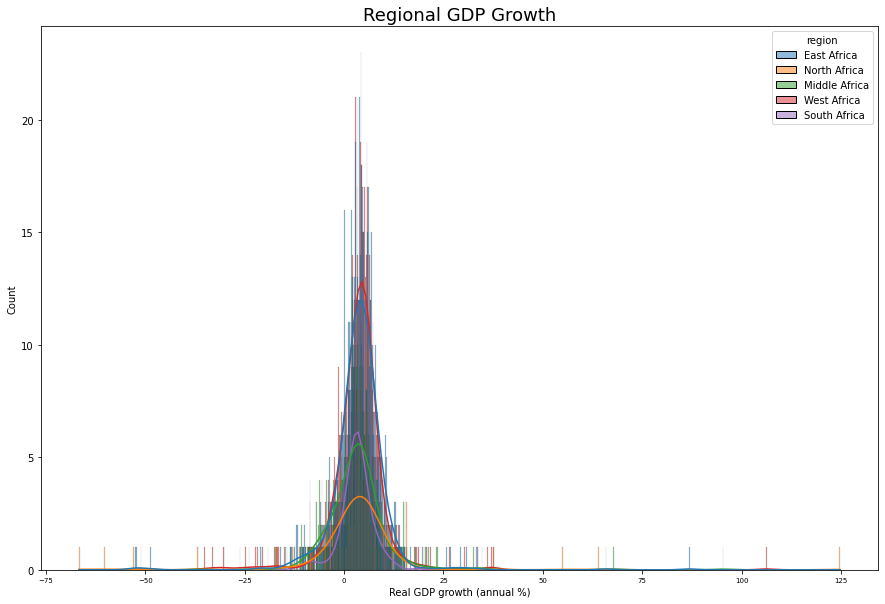

In [68]:
sns.histplot(data=africa_df, x= 'Real GDP growth (annual %)', hue='region', kde=True, bins=1000)
figsize=(199,199)
plt.title('Regional GDP Growth', fontsize = 18)
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["xtick.labelsize"] = 7

>It seems like West African Countries experience an explosion of GDP growth year after year especially compared to other regions. It makes sense when you consider it includes Economic powerhouses like Nigeria for instance.

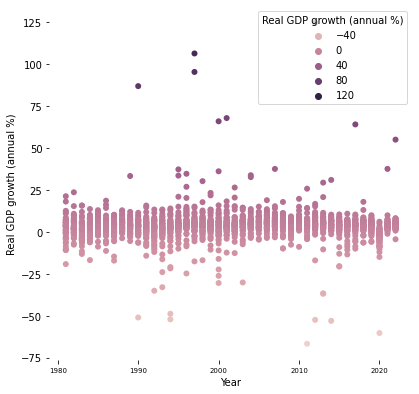

In [69]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='Year', y='Real GDP growth (annual %)', hue='Real GDP growth (annual %)',sizes=(1, 8), linewidth=0, data=africa_df, ax=ax);

>There are a few major outliers that I will need to address but generally we see positive trends in African GDP growth over the past couple of decades

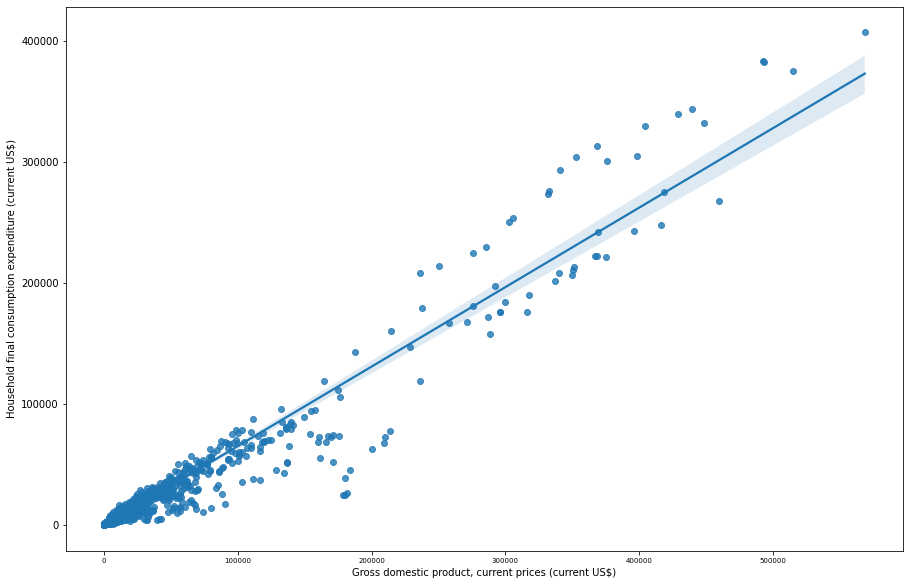

In [70]:
sns.regplot(x='Gross domestic product, current prices (current US$)', y='Household final consumption expenditure (current US$)', data=africa_df);

>Household Financial income obviously plays a big part in igniting an economic spark. When countries generally have more spending power, they typically (not always) have thriving economies. This positive correlation, I suppose will guide is in our understanding of African economics.

I think I want my target to be GDP growth per year; as GDP seems to always be a common economic growth identifier.

##**Model Development**

>K-Nearest Neighbor is the model I want to try to see if it accurately predicts GDP growth.

###**Train Test Split**

In [71]:
X = africa_df.drop(columns= ['Real GDP growth (annual %)', 'Year', 'Country'])

y = africa_df['Real GDP growth (annual %)']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

**Instantiate Transformers:**

In [78]:
scaler = StandardScaler()
ohe = OneHotEncoder

**Instantiate Column Transformers:**

In [73]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [74]:
num_pipe = make_pipeline(scaler)

cat_pipe = make_pipeline(ohe)

In [82]:
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

preprocessor = make_column_transformer(cat_tuple, num_tuple)

preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('type',
                                                  <class 'sklearn.preprocessing._encoders.OneHotEncoder'>)]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb7d2616b90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fb7d2616e90>)])

In [83]:
preprocessor.fit(X_train)

AttributeError: ignored

**Instantiate the model:**

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [84]:
knn_pipe = make_pipeline(ohe, scaler, knn)
knn_pipe.fit(X_train, y_train)

AttributeError: ignored